## Correlation

### Correlation Methodologies Comparison

| # | Methodology | Denotation | Applicable Variable Type | Range | Python code |
|------|------|------|------|------|------|
| 1 | Pearson Correlation Coefficient | $\rho$ | Continuous | [-1, 1] | `scipy.stats.pearsonr(x, y)` |
| 2 | Spearman's Rank Correlation Coefficient | $\rho$ | Continuous and Categorical (Ordinal) | [-1, 1] | `scipy.stats.spearmanr(x, y)` |
| 3 | Kendall's Tau Correlation Coefficient | $\tau_b$ or $\tau_c$ | Continuous and Categorical (Ordinal) | [-1, 1] | `scipy.stats.kendalltau(x, y, variant = 'b')`<br>`scipy.stats.kendalltau(x, y, variant = 'c')` |
| 4 | Point-Biserial Correlation Coefficient | $r_{pb}$ or $\rho_{pb}$ | Binary (Dichotomous) and Continuous | [-1, 1] | `scipy.stats.pointbiserialr(x, y)` |
| 5 | Phi Coefficient | $\phi$ | Binary (Dichotomous) | [-1, 1] | `sklearn.metrics.matthews_corrcoef(x, y)` |
| 6 | Cramer's V | $V$ | Categorical (Nominal) | [0, 1] |  |
| 7 | Polychoric Correlation Coefficient | $\rho$ | Categorical (Ordinal) | [-1, 1] |  |
| 8 | Partial Correlation Coefficient | $r$ or $\rho$ | Continuous and Categorical | [-1, 1] | `pingouin.partial_corr(data = df, x=x, y=x, covar=z, method = 'pearson')` |
| 9 | Tetrachoric Correlation Coefficient | $r$ or $\rho$ | Binary (Dichotomous) | [-1, 1] |  |


# Data Set

Для реализации некоторых корреляционных методик мы будем использовать набор данных из [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/dataset/10/automobile) (CC BY 4.0), который включает цены на автомобили и набор свойств автомобилей, связанных с каждой ценой. Я очистил и отфильтровал данные, которые можно загрузить по [этой ссылке](https://gist.github.com/fmnobar/c9b4029e08e97978a9a53f4eb034b16f). В некоторых корреляционных методологиях мы будем рассматривать корреляцию между ценой автомобиля и размером двигателя или типом топлива автомобиля. Для остальных методик мы будем создавать небольшие наборы данных на месте.

Давайте импортируем данные об автомобилях, а затем изобразим цену и объем двигателя в виде диаграммы рассеяния, чтобы лучше понять визуальную взаимосвязь между этими двумя переменными.

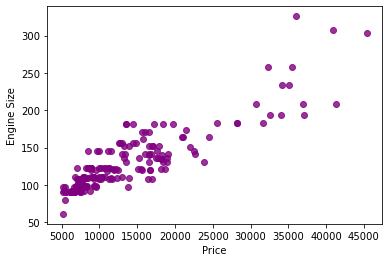

In [12]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Show all columns/rows of the dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Read the data
df = pd.read_csv('auto-cleaned.csv')

# Create the scatterplot
sns.regplot(data = df, x = 'price', y = 'engine-size', fit_reg = False, color = 'purple')

# Add labels for X and Y axes
plt.xlabel('Price')
plt.ylabel('Engine Size')
plt.show()

Диаграмма рассеяния показывает, что с ростом цен увеличиваются размеры двигателя. Поэтому мы ожидаем, что корреляция будет положительной. Давайте посмотрим, подтверждают ли это расчеты.

# Correlation Measurement Methodologies

## 1. Pearson's Correlation Coefficient

Это наиболее широко используемая корреляция. Коэффициент корреляции Пирсона, который также известен как $r$ Пирсона, является мерой линейной корреляции между двумя непрерывными переменными. Как следует из определения, этот метод предполагает линейную связь между двумя переменными и поэтому не подходит для нелинейных отношений.

Математически она может быть рассчитана следующим образом:

$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

где

- $x_i$ и $y_i$: реализации СВ X и Y,
- $\bar{x}$ и $\bar{y}$: выборочные средние
- $n$: чмсло наблюдений

### 1.1. Pearson's Correlation Coefficient - Implementation

Нам не нужно вычислять это самостоятельно. Давайте воспользуемся Python для вычисления $r$ Пирсона между ценой и объемом двигателя в нашем наборе данных.

In [13]:
# Calculate Pearson's r
stats.pearsonr(df['price'], df['engine-size'])

PearsonRResult(statistic=0.8887784953105814, pvalue=1.2525079178141828e-66)

"statistic" of ~0.89 is the correlation coefficient that we were looking for. As we expected, there is a positive (and relatively strong) correlation between the two. The "pvalue" is the result of the null hypothesis test that the distributions of the provided data are uncorrelated and normally distributed. The p-value is a very small number in this example, meaning we can reject the null hypothesis (i.e. there is a correlation).

## 2. Spearman's Rank Correlation Coefficient

Also known as Spearman's $\rho$ (reads as "rho") is a measure of rank correlation between two variables, which measures how well the relationship between the two variables can be described by a monotonic function. Conceptually, this is much simpler than it sounds, once we define "rank correlation" and "monotonic function". 

- **Rank Correlation:** Rank correlation measures the similarity of the order of two sets of data, relative to each other (recall that PCC did not directly measure the relative rank).
- **Monotonic Function:** A function is called monotonic if and only if it preserves the given order of its arguments - in other words, the function always increases or always decreases as the input values increase (which sounds just like correlation as we defined it). There is a distinction between a monotonic relationship and a linear relationship. Linear relationship is a specific type of monotonic relationship where the rate of increase remains constant - in other words, unlike a linear relationship, the amount of change (increase or decrease) in a monotonic relationship can vary. 

Mathematically, and when all $n$ ranks are distinct integers, it calculates as follows:

$$\rho = 1-\frac{6\sum d_i^2}{n(n^2-1)}$$

Where:

- $d_i$: Difference in rank between the two variables for the i-th observation
- $n$: Number of observations

### 2.1. Spearman's Rank Correlation Coefficient - Implementation

Let's look at how this can be calculated in Python for the same two variables of price and engine size.

In [14]:
# Calculate Spearman's rho
stats.spearmanr(df['price'], df['engine-size'])

SpearmanrResult(correlation=0.8733307703719501, pvalue=1.4412962530876853e-61)

Very similar results to Pearson's $r$, as expected.

## 3. Kendall's Tau 

Kendall's Tau, denoted by $\tau$, is a non-parametric measure of rank correlation. We know what rank correlation means from the prevous correlation methodology. Non-parametric means it does not rely on the probability distribution of the underlying data. Kendall's Tau is non-parametric because it only measures the rank correlation based on the relative ordering of the data (and not the specific values of the data). 

Mathematically, Kendall's Tau can be calculated in two different ways, which only differ in how they are normalized to be limited to the range of -1 to 1. We will define both here for reference:

$$\tau_b = \frac{P - Q}{\sqrt{(P + Q + T) * (P + Q + U)}}$$

Where:

- P: Number of concordant pairs
- Q: Number of discordant pairs
- T: Number of ties only in X
- U: Number of ties only in Y (if a tie happens at both X and Y, it is not added to T or U)

$$\tau_c = \frac{(P - Q)}{n^2 * \frac{(m - 1)}{m}}$$

Where:

- P: Number of concordant pairs
- Q: Number of discordant pairs
- n: Total number of observations
- m: The smaller of the number of unique values in either X or Y

Concordant pair means that both observations are ranked the same way relative to other observations. For example, let's assume:

$$ A = [x_1, y_1]$$
$$ B = [x_2, y_2]$$

and then the two pairs of observations are $(x_1, x_2)$ and $(y_1, y_2)$. Then this pair is considered concordant in a case where if $x_1$ is ranked higher than $x_2$, then $y_1$ is also ranked higher than $y_2$. The reverse would be discordant. 

### 3.1. Kendall's Tau - Implementation

Let's look at how these two interpretations of Kendall's Tau can be calculated in Python for the same two variables of price and engine size. 

In [15]:
# Calculate Kendall's Tau
tau_b = stats.kendalltau(df['price'], df['engine-size'], variant = 'b')
tau_c = stats.kendalltau(df['price'], df['engine-size'], variant = 'c')

print(f"Kendall's Tau (b) is: {tau_b}")
print(f"Kendall's Tau (c) is: {tau_c}")

Kendall's Tau (b) is: KendalltauResult(correlation=0.7014823398445257, pvalue=8.148712068837136e-46)
Kendall's Tau (c) is: KendalltauResult(correlation=0.700979066035846, pvalue=8.148712068837136e-46)


Similar to other correlation measures, there is a positive correlation along with a very small "pvalue", suggesting the existence of a correlation. And as expected, there is not a large difference between the two implematation of Tau b or c. 

## 4. Point-Biserial

Point-Biserial correlation coefficient ($r_{pb}$) measures the correlation between a binary (or dichotomous) and a continuous variable. A binary or dichotomous variable is one that only takes two values (e.g. 0 or 1, female or male, etc.). As an example, recall that Pearson's $r$ measures the correlation between the two *continuous* variables. But there are cases where we deal with one binary and one continuous variable. In such cases, we can use the Point-Biserial correlation coefficient. 

Point-Biserial correlation coefficient ($r_{pb}$) can be calculated as follows:

$$r_{pb} = \frac{X_1 - X_0}{s_n}\sqrt{\frac{n_1n_0}{n^2}}$$

Where:

- $X_1$: Mean of the continuous variable for the group defined by the binary variable = 1
- $X_0$: Mean of the continuous variable for the group defined by the binary variable = 0
- $s_{pooled}$: Pooled standard deviation of the continuous variable
- $n_1$: Number of data points for the group defined by the binary variable = 1
- $n_0$: Number of data points for the group defined by the binary variable = 0
- $n$: Total sample size

### 4.1. Point-Biserial - Implementation

In our data set, fuel type can either be gas or diesel, which we can use as a binary variable. First we will create a new column named "fuel-type-binary" where shows a value of 0 for gas and 1 for diesel. Then we calculate the Point-Biserial correlation coefficient between fuel type and car price. 

In [16]:
# Create the new column for the binary values
df['fuel-type-binary'] = df['fuel-type'].replace({'gas' : 0, 'diesel' : 1})

# Calculate Point-Biserial correlation coefficient
stats.pointbiserialr(df['price'], df['fuel-type-binary'])

PointbiserialrResult(correlation=0.11544021925980438, pvalue=0.10989215292636732)

## 5. Phi Coefficient

Phi coefficient (a.k.a. mean square contingency coefficient), denoted by $\phi$, is yet another measure of association (or correlation) between two variables but it is only used when both are binary or dichotomous variables. If you are a machine learning practitioner with a focus on classification, you may also know this as the Matthews Correlation Coefficient (MCC). In machine learning, MCC is used as a measure of quality of binary or multiclass classifications. 

Mathematically, $\phi$ for two binary variables of X and Y is defined as follows:

$$ \phi = \frac{n_{11} * n_{00} - n_{10} * n_{01}}{\sqrt{n_{1o} * n_{o1} * n_{o0} * n_{0o}}} $$

Where:

| | Y = 1 | Y = 0 | Total |
|--|--|--|--|
| X = 1 | $n_{11}$ | $n_{10}$ | $n_{1o}$ |
| X = 0 | $n_{01}$ | $n_{00}$ | $n_{0o}$ |
| Total | $n_{o1}$ | $n_{o0}$ | $n$ |

- $n_{11}$: Number of observations where both variables X and Y are 1
- $n_{00}$: Number of observations where both variables X and Y are 0
- $n_{10}$: Number of observations where variable X is 1 and variable Y is 0
- $n_{01}$: Number of observations where variable X is 0 and variable Y is 1
- $n_{1o}$: Number of observations where variable X is 1
- $n_{0o}$: Number of observations where variable X is 0
- $n_{o1}$: Number of observations where variable Y is 1
- $n_{o0}$: Number of observations where variable Y is 0
- $n$: Total number of observations

The tabular representation above is called a "contingency table". Next, let's look at how we can implement Phi Coefficient in Python. We will cover two approaches here for the sake of completeness. 

### 5.1. Phi Coefficient - Implementation In Pandas

We will take the following steps in the code block below:

1. Import necessary packages
2. Create a dataframe from two assumed binary variables of X and Y
3. Create a contingency table
4. Calculate the Phi Coefficient

In [17]:
# Import necessary packages
import pandas as pd
import math

# Create a dataframe from two assumed binary variables of X and Y
df = pd.DataFrame({'X': [1, 1, 0, 0, 1, 0], 'Y': [1, 0, 1, 1, 0, 1]})

# Create a contingency table
table = pd.crosstab(df['X'], df['Y'])

# Extract the values from the table
n11 = table.iloc[0,0]
n10 = table.iloc[0,1]
n01 = table.iloc[1,0]
n00 = table.iloc[1,1]

# Calculate the phi coefficient
coef = (n11*n00 - n10*n01) / (math.sqrt((n11+n10)*(n11+n01)*(n00+n10)*(n00+n01)))

print(f"Phi Coefficient: {coef}")

Phi Coefficient: -0.7071067811865476


This is not difficult to calculate but still is relatively manual and prone to error. Let's look at the second approach, which is much more straight forward.

### 5.2. Phi Coefficient - Implementation In scikit-learn

Remember that Phi Coefficient is also known as the Matthews Correlation Coefficient (MCC)? scikit-learn happens to have that in their library so let's see how we can implement it, following below steps:

1. Import necessary packages
2. Create two assumed binary variables
3. Calculate MCC

In [18]:
# Import necessary packages
from sklearn.metrics import matthews_corrcoef

# Create two assumed binary variables
X = [1, 1, 0, 0, 1, 0]
Y = [1, 0, 1, 1, 0, 1]

# Calculate MCC
mcc = matthews_corrcoef(X, Y)
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: -0.7071067811865476


As expected, this number is identical to the number we generated in the first approach. 

***Pro Tip:** This method is intended to measure the quality of binary (and multi-class) classifications and we are using it to calculate the association between the two variables in this example. Typical use cases in machine learning would be to use the MCC to measure the correlation or association of ground truth and predicted values in a classification problem. Our approach here is fine and it generates the correct results but that is an important caveat, in case you decide to use MCC in the future.*

## 6. Cramer's V

Cramer's V (a.k.a. Cramer's Phi and denoted by $\phi_c$ or $V$) is a measure of association (or correlation) between two categorical (**nominal**) variables. This is very similar to Phi Coefficient but it is more generalized in that it can be applied to $n*n$ contingency tables (unlike $\phi$, which can only be applied to binary variables).

***Important Note:** This is the only measure in this post with a range of 0 to 1 (inclusive) (compared to other correlation measures with the range of -1 to 1, inclusive).*

Cramer's V can be calculated as follows:

$$V =  \sqrt{\frac{\chi^2}{n * min(k-1, r-1)}}$$

Where:
- $V$: Cramer's V
- $\chi^2$: Chi-squared statistic
- $n$: Sample size (i.e. total number of observations)
- $k$: Number of categories in one of the two variables
- $r$: Number of categories in the other variable

### 6.1. Cramer's V - Implementation

Let's look at an example of how we can implement Cramer's V. We will be taking the following steps:

1. Import necessary libraries
2. Create a dataframe of two variables of X and Y, each with two different classes
3. Create a contingency table
4. Calculate the chi-squared statistic
5. Calculate Cramer's V

In [19]:
# Import necessary libraries
import pandas as pd
import math

# Create a dataframe
df = pd.DataFrame({'X': ['A', 'A', 'B', 'B', 'A', 'B'], 'Y': ['W', 'X', 'W', 'W', 'X', 'W']})

# Create a contingency table
table = pd.crosstab(df['X'], df['Y'])

#Calculate the chi-squared statistic and the p-value
chi2, p, dof, expected = stats.chi2_contingency(table)

#Calculate Cramer's V
V = math.sqrt(chi2 / (table.values.sum()*min(table.shape[0]-1, table.shape[1]-1)))

print(f"Cramer's V: {V}")

Cramer's V: 0.3535533905932738


## 7. Polychoric Correlation

Polychoric correlation is a measure of association (or correlation) between two categorical (**ordinal**) variables. Since these are ordinal variables, the correlation considers the strength and direction of association (and hence the range of -1 to 1, unlike Cramer's V). A special case of Polychoric Correlation, which is more frequently used is Tetrachoric Correlation that is only used with binary or dichotomous variables - we will cover that one later in the post. 

Полихорная корреляция - это мера связи (или корреляции) между двумя категориальными (**ординальными**) переменными. Поскольку это порядковые переменные, корреляция учитывает силу и направление связи (и, следовательно, диапазон от -1 до 1, в отличие от V Крамера). Частным случаем полихорной корреляции, который используется чаще, является тетрахорная корреляция, которая используется только с бинарными или дихотомическими переменными.


## 8. Partial Correlation

Partial Correlation is a measure of correlation between two variables while controlling for one or more confounding factors. A confounding factor is a variable that is related to both independent and dependent (i.e output) variables. In other words, Partial Correlation measures the association (or correlation) between two variables when the effects of one or more other variables are removed from such a relationship.

A frequently used example of confounding factor is a study focused on the relationship between smoking (X) and lung cancer (Y). In this study, age (Z) is a confounding factor. Smokers tend to be older and age itself is a risk factor for lung cancer. Therefore, age (Z) can impact both smoking (X) and lung cancer (Y). Then partial correlation can be used to control for the confounding effect of Z (i.e. remove the impact of age from the study) and then the study will focus on the correlation between smoking (X) and lung cancer (Y) in a controlled environment.

Partial correlation can be calculated as follows:

$$
\frac{\text{Cov}(X,Y) - \text{Cov}(X,Z)*\text{Cov}(Z,Y)}{\sqrt{\text{Var}(X) - \text{Cov}^2(X,Z)}\sqrt{\text{Var}(Y) - \text{Cov}^2(Y,Z)}}
$$

Where Covariance and Variance are calculated as:

$$
\text{Cov}(X,Y) = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{n-1}
$$

$$
\text{Var}(X) = \text{Cov}(X,X) = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}
$$

- $n$: Number of observations
- $x_i$ and $y_i$: i-th observations of the variables X and Y
- $\bar{x}$ and $\bar{y}$: Means of the variables X and Y

We will look at two methods of implementing Partial Correlation in Python, first by directly calculating such a correlation and second by using a Python library to streamline the process. 

### 8.1. Partial Correlation - Implementation In Pandas

Partial Correlation's formula looks daunting but it can easily be implemented in Python. Let's look at an example where we will be taking the following steps:

1. Import necessary packages
2. Create a dataframe of X, Y and Z variables
3. Calculate the Partial Correlation between X and Y, while controlling for Z

In [20]:
# Import necessary packages
import pandas as pd

# Create a dataframe of X, Y and Z variables
data = {
    'X': [1, 1, 9, 0, 1, 8, 10, 7, 10, 0, 1, 9, 0, 6, 2, 6, 9, 0, 9, 7], 
    'Y': [8, 2, 4, 3, 0, 1, 6, 0, 5, 6, 10, 3, 2, 7, 4, 5, 6, 0, 5, 10],
    'Z': [0, 2, 1, 1, 2, 2, 7, 7, 2, 6, 4, 4, 7, 7, 6, 6, 1, 6, 4, 7]
}

df = pd.DataFrame(data)

# Create a correlation matrix
corr_matrix = df.corr()

x_y_correlation = corr_matrix.loc['X', 'Y']
x_z_correlation = corr_matrix.loc['X', 'Z']
y_z_correlation = corr_matrix.loc['Y', 'Z']

# Calculate the Partial Correlation between X and Y, while controlling for Z
partial_correlation_xy_z = (x_y_correlation - (x_z_correlation * y_z_correlation)) / ((1 - (x_z_correlation ** 2)) * (1 - (y_z_correlation ** 2))) ** 0.5

print(f"Partial Correlation (between X and Y, while controlling for Z): {partial_correlation_xy_z}")


Partial Correlation (between X and Y, while controlling for Z): 0.14040597205107264


### 8.2. Partial Correlation - Implementation In Pingouin

Previous approach helps with understanding the concept of Partial Correlation but it is not very efficient to create each of the correlations and use the formula to calculate the partial correlation - it also increases the opportunity for human error. In the code block below, we will be leveraging the [pingouin](https://pingouin-stats.org/build/html/index.html) library to make the process easier, by going through the following steps:

1. Import necessary packages
2. Create a dataframe of X, Y and Z variables
3. Calculate the Partial Correlation between X and Y, while controlling for Z

In [21]:
# Import necessary packages
import pandas as pd
import pingouin as pg

# Create a dataframe of X, Y and Z variables
data = {
    'X': [1, 1, 9, 0, 1, 8, 10, 7, 10, 0, 1, 9, 0, 6, 2, 6, 9, 0, 9, 7], 
    'Y': [8, 2, 4, 3, 0, 1, 6, 0, 5, 6, 10, 3, 2, 7, 4, 5, 6, 0, 5, 10],
    'Z': [0, 2, 1, 1, 2, 2, 7, 7, 2, 6, 4, 4, 7, 7, 6, 6, 1, 6, 4, 7]
}
df = pd.DataFrame(data)

# Calculate the Partial Correlation between X and Y, while controlling for Z
partial_correlation_xy_z = pg.partial_corr(data = df, x='X', y='Y', covar='Z', method = 'pearson')

print(partial_correlation_xy_z)

          n         r          CI95%     p-val
pearson  20  0.140406  [-0.34, 0.56]  0.566429


Results are helpful in that there are additional fields. Let's look at what these fields convey ([source](https://pingouin-stats.org/build/html/generated/pingouin.partial_corr.html#pingouin.partial_corr)):

- n: Sample size
- r: Partial correlation coefficient
- CI95%: 95% parametric confidence intervals around r
- p-val: p-value

Note that we decided to use Pearson's $r$ in this specific implementation, using `method = 'pearson'`. Another option is to use Spearman $\rho$ by including `method = 'spearman'`. 

## 9. Tetrachoric Correlation Coefficient

Tetrachoric Correlation Coefficient, is a special case of Polychoric Correlation that measures association between two binary (or dichotomous) variables. Recall that Phi Coefficient also measures association between two binary variables. The difference is that Phi Coefficient assumes a normal distribution of the underlying data, while Tetrachoric Correlation assumes a bivariate normal distribution. In other words, Tetrachoric Correlation assumes that the binary variables are generated from a continuous variable that follows a normal distribution, while Phi Correlation assumes that the binary variables themselves follow a normal distribution. Tetrachoric Correlation is useful in cases where the underlying continuous variable are not directly observable but can be assumed normally distributed. Such cases are common in psychological, medical, marketing and/or social sciences research where the underlying behavior is not directly observable (e.g. association between self-reported political views and actual voting behavior).

Коэффициент тетрахорической корреляции - это частный случай полихорической корреляции, который измеряет связь между двумя бинарными (или дихотомическими) переменными. Напомним, что коэффициент Phi также измеряет связь между двумя бинарными переменными. Разница в том, что коэффициент Phi предполагает нормальное распределение исходных данных, в то время как тетрахорическая корреляция предполагает двумерное нормальное распределение. Другими словами, тетрахорическая корреляция предполагает, что бинарные переменные получены из непрерывной переменной, которая следует нормальному распределению, в то время как Phi Correlation предполагает, что бинарные переменные сами следуют нормальному распределению. Тетрахорическая корреляция полезна в случаях, когда лежащая в основе непрерывная переменная не поддается непосредственному наблюдению, но можно предположить, что она нормально распределена. Такие случаи часто встречаются в психологических, медицинских, маркетинговых и/или социальных исследованиях, где поведение, лежащее в основе, не поддается непосредственному наблюдению (например, связь между самоотчетом о политических взглядах и фактическим поведением при голосовании).